# ChatGPT User Reviews: Modeling

**Problem Statement**: To enhance the customer experience for (online) products, this project will analyze user reviews on ChatGPT from the iOS store. By leveraging NLP techniques, I aim to classify overall sentiment, extract product-related feedback and identify trends in user satisfaction. Insights from this analysis will inform actionable recommendations to improve a product’s usability, functionality and overall satisfaction.

**Background:** Clustering allows the ability to group similar data points, in this case, product reviews. I want to use K-Means because it can help us understand patterns or themes within the customer reviews. I am hoping that these clusters will represent distinct customer sentiments or opinions on the various feature of the product.

**Sources:**
> https://www.ibm.com/topics/k-means-clustering

> https://git.generalassemb.ly/dsb-826/8.01-lesson-kmeans

> https://git.generalassemb.ly/dsb-826/6.06-lesson-intro-to-spacy

> https://www.geeksforgeeks.org/defaultdict-in-python/#

In [ ]:
# Imports

import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
file_path = "chatgpt_cleaned_features.csv"
df = pd.read_csv(file_path)

In [ ]:
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_md")

In [ ]:
# word embeddings func
def review_embeddings(reviews):
  """
    Generate word embeddings for a list of reviews.
    Uses SpaCy's pre-trained NLP model to compute word embeddings for each review.

    Parameters:
    -----------
    reviews : list of str
        A list of text reviews for which embeddings are to be generated.

    Returns:
    --------
    numpy.ndarray
        A 2D NumPy array where each row represents the embedding (vector) of a
        corresponding review from the input list. The dimensionality of each vector
        depends on the SpaCy model being used.
  """
  return np.array([nlp(review).vector for review in reviews])

In [ ]:
# Define X
X = review_embeddings(df['cleaned_reviews'])

In [ ]:
# Initialize the KMeans model and fit the model
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [ ]:
# get features and their corresponding opinions
def features_and_opinions(text):
    doc = nlp(text)
    pairs = []
    for token in doc:
        if token.pos_ == "NOUN":
            adjectives = [child.text for child in token.children if child.pos_ == "ADJ"]
            for adj in adjectives:
                pairs.append((token.text, adj))
    return pairs

In [ ]:
df['features_opinions'] = df['cleaned_reviews'].apply(features_and_opinions)

In [ ]:
df[['review', 'features_opinions']].head()

,review,features_opinions
0,Up to this point I’ve mostly been using ChatGP...,"[(screen, doable), (site, difficult), (user, a..."
1,I’ve been a user since it’s initial roll out a...,"[(application, mobile), (reference, initial), ..."
2,This app would almost be perfect if it wasn’t ...,"[(function, little), (chat, lengthy), (part, s..."
3,"I recently downloaded the app and overall, it'...","[(platform, great), (couple, excellent), (coup..."
4,I appreciate the devs implementing Siri suppor...,"[(app, usefulness), (query, possible), (query,..."


In [ ]:
def analyze_cluster_features(cluster_id):
    """
    Aggregate feature-opinion pairs for a specific cluster.
    """
    cluster_data = df[df['cluster'] == cluster_id]
    feature_opinion_agg = defaultdict(list)
    for pairs in cluster_data['features_opinions']:
        for feature, opinion in pairs:
            feature_opinion_agg[feature].append(opinion)
    return {feature: opinions for feature, opinions in feature_opinion_agg.items()}

In [ ]:
cluster_0_features = analyze_cluster_features(0)
print("Cluster 0 Feature-Opinion Analysis:")
print(cluster_0_features)

Cluster 0 Feature-Opinion Analysis:
{'application': ['mobile'], 'reference': ['initial'], 'tool': ['crucial'], 'time': ['far', 'prompt', 'excellent', 'long', 'warm', 'long', 'long', 'single', 'great', 'short', 'half'], 'ability': ['wrong', 'previous', 'open', 'delete', 'local', 'precise', 'educational'], 'phone': ['quick', 'good', 'mobile', 'mobile', 'mobile', 'proper', 'smart', 'good', 'vibrate', 'close', 'new', 'pro', 'max', 'overheat'], 'app': ['mobile', 'prompt', 'click', 'mobile', 'nice', 'official', 'little', 'long', 'great', 'accurate', 'new', 'fine', 'amazed', 'foremost', 'amazing', 'different', 'impressed', 'good', 'little', 'usual', 'overall', 'negative', 'new', 'different', 'polished', 'rushedoutthedoor', 'annoying', 'simple', 'straightforward', 'little', 'difficult', 'crazy', 'great', 'official', 'native', 'far', 'native', 'good', 'native', 'great', 'overall', 'mobile', 'accessible', 'great', 'official', 'equivalent', 'minor', 'good', 'great', 'native', 'official', 'mobile'

In [ ]:
cluster_summary = df['cluster'].value_counts()
print(cluster_summary)

cluster
3    769
0    604
4    406
5    305
2     87
1     61
6     47
7     13
Name: count, dtype: int64


In [ ]:
# Let's take a look at each cluster and the features/opinions in them
for cluster_id in df['cluster'].unique():
    print(f"\nCluster {cluster_id} Features and Opinions:")
    features_opinions = analyze_cluster_features(cluster_id)
    print(features_opinions)


Cluster 3 Features and Opinions:
{'screen': ['doable', 'large', 'simplistic', 'present', 'big', 'large', 'wide', 'possible', 'small', 'inaccurate', 'good', 'inaccurate', 'small', 'large', 'able', 'large', 'big', 'mobile'], 'site': ['difficult'], 'user': ['advanced', 'sleek', 'coherent', 'coherent', 'firsttime', 'wonderful', 'impair', 'certain', 'assistant', 'professional', 'academic', 'dyslexic', 'early', 'mean', 'valuable', 'super', 'helpful', 'overzealous', 'outrageous', 'casual', 'offload', 'neural', 'valuable', 'normal', 'individual', 'versatile', 'wide', 'real', 'exceptional', 'foremost', 'versatile', 'firsthand', 'ongoing', 'indispensable', 'personal', 'open', 'responsive', 'exceptional', 'admirable', 'humble', 'avid', 'vast'], 'feedback': ['numerous', 'haptic', 'positive', 'haptic', 'haptic', 'haptic', 'haptic', 'haptic', 'streamlined', 'haptic', 'haptic', 'haptic', 'amazing', 'ill', 'good', 'valuable', 'clean', 'haptic', 'haptic', 'haptic', 'clean', 'haptic', 'haptic', 'haptic

In [ ]:
# Example reviews in each cluster to grasp what each cluster looks like
for cluster_id in df['cluster'].unique():
    print(f"\nCluster {cluster_id}:")
    sample_reviews = df[df['cluster'] == cluster_id]['review'].sample(3, random_state=42)
    print(sample_reviews.tolist())


Cluster 3:
["Title: An Exceptional Experience with ChatGPT: Truly Amazing!\n\nReview:\nI recently had the pleasure of using ChatGPT, and I must say, it was nothing short of amazing! From the moment I started interacting with this language model, I was blown away by its capabilities and the quality of responses it provided. ChatGPT truly exceeded my expectations.\n\nFirst and foremost, the accuracy and relevance of the answers were outstanding. Whether I had a question about history, science, or even pop culture, ChatGPT consistently delivered well-informed and helpful responses. It felt like having a knowledgeable companion at my fingertips, ready to provide information and engage in meaningful conversations.\n\nFurthermore, the versatility of ChatGPT is truly impressive. It seamlessly handled a wide range of topics, demonstrating its adaptability and capacity to understand context. No matter the subject, I felt confident in relying on ChatGPT to provide thoughtful and insightful resp

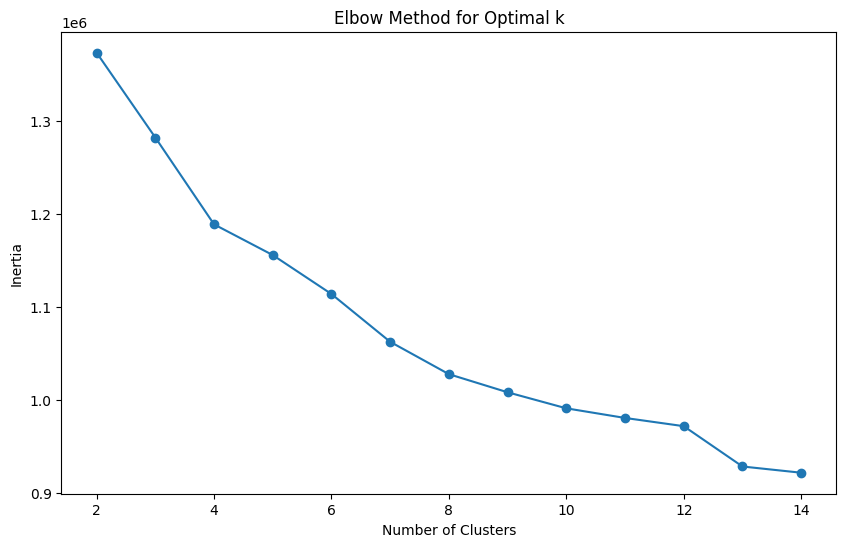

In [ ]:
inertia = []
# Let's try different ks
k_values = range(2, 15)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

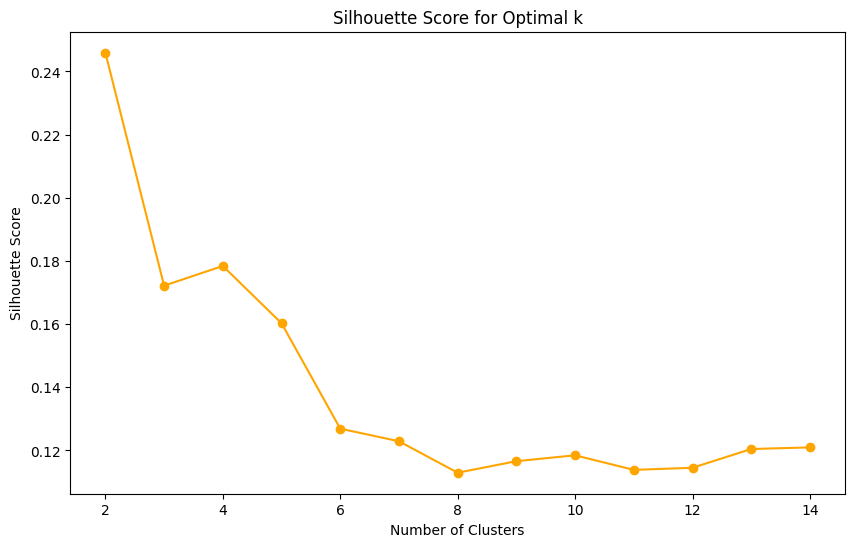

In [ ]:
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The silhoutte score closer to +1 indicates well-formed clusters. On the positive side (pun intended), our silhoutte score is not negative. This measures how similar a point is to its own cluster compared to neighboring clusters. We can see from both the elbow curve and silhoutte scores the most optimal K-value is 4. This means that 4 clusters results in the most accurate and efficient number of clusters.

Source: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2


In [ ]:
df['processed_reviews'] = df['processed_reviews'].fillna("").astype(str)
embedder = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = embedder.encode(df['processed_reviews'])

In [ ]:
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings, kmeans.labels_))

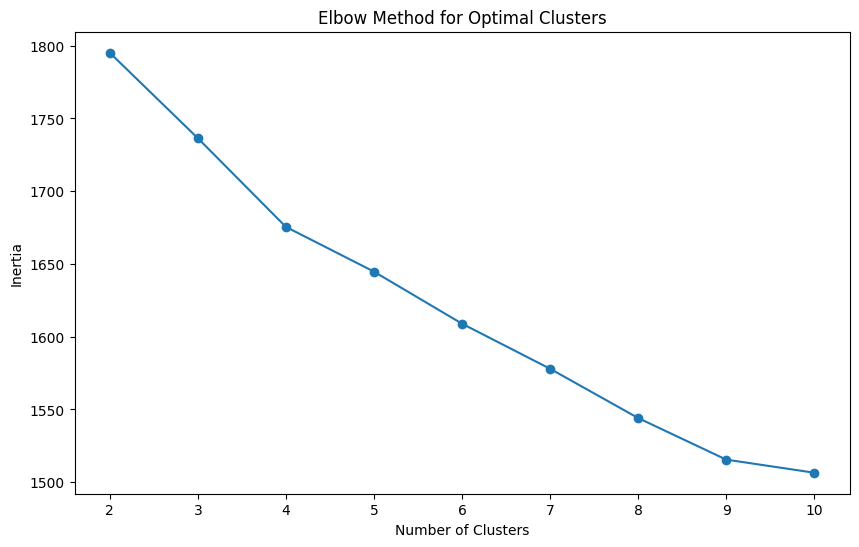

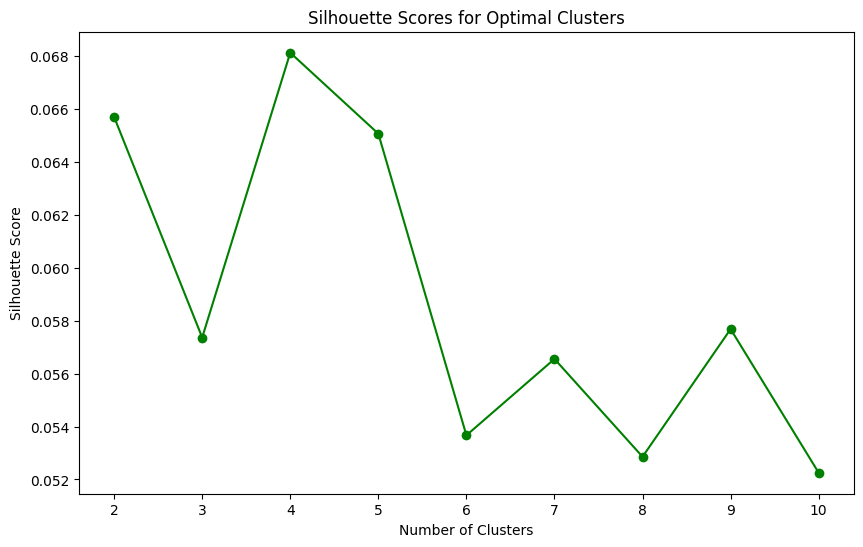

In [ ]:
# Plot elbow chart
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Using a K-Means model made sense to me for the goal of my project because clustering allows us to group similar data points and uncover patterns or themes within customer reviews. I had hoped to see that the clusters would represent distinct customer sentiments or opinions, especially regarding unique features on the product.

It is obvious that the silhoutte scores are not performing as well as I had hoped they would. From here, I would like to pivot to using SVM instead. Here's why this could be more successful:

A supervised learning algorithm like SVM is able to find the an optimal way to classify labeled data. It is extremely effective when there is labeled data and the goal is classification. This leads me to believe that this problem may benefit from a supervised model rather than an unsupervised model. K-means is an unsupervised algorithm that assigns data into clusters based purely on distance metrics. Because it does not use labels, this can lead to inaccurate groupings as we can see above.

Here, it is important to note that the SVM model would highly benefit from dimensionality reduction with PCA. PCA reduces the high-dimensional embeddings to a smaller number of features which is able to capture variance most relevant for classification.  

While evaluating the SVM model, I would look at metrics like accuracy, precision, recall and F1 score. This would give a better understanding of whether classification goals were met.

All of this being said, I do not want to completely abandon the idea of fine-tuning and working on the unsupervised clustering model. I still believe that this model can lead to meaningful insights. First, obviously, I believe that collecting more data will improve the model's ability to cluster similar features more effectively. The project can also be taken to the next level where with ample data, clustering can reveal segments of users with similar preferences which can be incredibly useful for personalized marketing or product reccomendations. For example, we may have a cluster that reveals users who prioritize design while others prefer budget. This can be incredibly valuable information for a company who wants to further market their product. Analyzing clusters can also inform product roadmap decisions. K-Means also allows for great interpretability as each cluster has a centroid which represents the average review in each specific cluster. This could help us understand what the "typical" review in each cluster looks like.

